<a href="https://colab.research.google.com/github/sayeednote2/AlmaBetter/blob/main/Amazon_Prime_TV_Shows_and_Movies_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -  **Amazon Prime TV Shows and Movies EDA Analysis**



##### **Project Type**    - EDA
##### **Contribution**    - Individual


# **Problem Statement**


**Business Context**

In today's competitive streaming industry, platforms like Amazon Prime Video are constantly expanding their content libraries to cater to diverse audiences. With a growing number of shows and movies available on the platform, data-driven insights play a crucial role in understanding trends, audience preferences, and content strategy.This dataset has data available in the United States.


#### **Define Your Business Objective?**

***Uncover key trends that influence subscription growth, user engagement, and content investment strategies in the streaming industry.***

# ***Let's Begin !***

### Import Libraries

In [ ]:
# Import Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import requests
import datetime as dt
from zoneinfo import ZoneInfo
import ast

### Dataset Loading

In [ ]:
titles_path = 'https://drive.google.com/file/d/1AENpSppSxobBRaMQ6bXojGrfYvjKal0I/view?usp=sharing'
# Extract the file ID from the sharing link
titles_file_id = titles_path.split('/')[-2] # 1AENpSppSxobBRaMQ6bXojGrfYvjKal0I
# Construct the direct download URL
titles_url = f'https://drive.google.com/uc?id={titles_file_id}'
titles_df = pd.read_csv(titles_url)

credits_path = 'https://drive.google.com/file/d/18S6C8gA5OcVNbBQKlFNz2EjC_e75y6Of/view?usp=sharing'
credits_file_id = credits_path.split('/')[-2] # 18S6C8gA5OcVNbBQKlFNz2EjC_e75y6Of
credits_url = f'https://drive.google.com/uc?id={credits_file_id}'
credits_df = pd.read_csv(credits_url)

# ***1. Understanding the Data***

## **a) DataSet column Description**

### Titles DataSet column Description.

* **id**                  :The title ID.

* **title**         :The name of the title.

* **show_type**            :TV show or movie.

* **description**              :A brief description.

* **release_year**             :The release year.

* **age_certification**          :The age certification.

* **runtime**              :The length of the episode (SHOW) or movie.

* **genres**         :A list of genres.
* **production_countries**: A list of countries that produced the title.
* **seasons**: Number of seasons if it's a SHOW.
* **imdb_id**: The title ID on IMDB.
* **imdb_score**: Score on IMDB.
* **imdb_votes**: Votes on IMDB.
* **tmdb_popularity**: Popularity on TMDB.
* **tmdb_score**: Score on TMDB.

### Credits DataSet column Description.

* **person_ID**: The person ID on JustWatch.
* **id**: The title ID on JustWatch.
* **name**: The actor or director's name.
* **character_name**: The character name.
* **role**: ACTOR or DIRECTOR.

## **b) Columns of the DataSet**

In [ ]:
# Titles Dataset Columns
titles_df.columns

Index(['id', 'title', 'type', 'description', 'release_year',
       'age_certification', 'runtime', 'genres', 'production_countries',
       'seasons', 'imdb_id', 'imdb_score', 'imdb_votes', 'tmdb_popularity',
       'tmdb_score'],
      dtype='object')

In [ ]:
# Credits Dataset Columns
credits_df.columns

Index(['person_id', 'id', 'name', 'character', 'role'], dtype='object')

## **c) Head of the DataSet**

In [ ]:
#First 3 rows of Titles DataSet
titles_df.head(3)

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts20945,The Three Stooges,SHOW,The Three Stooges were an American vaudeville ...,1934,TV-PG,19,"['comedy', 'family', 'animation', 'action', 'f...",['US'],26.0,tt0850645,8.6,1092.0,15.424,7.6
1,tm19248,The General,MOVIE,"During America’s Civil War, Union spies steal ...",1926,NaN,78,"['action', 'drama', 'war', 'western', 'comedy'...",['US'],NaN,tt0017925,8.2,89766.0,8.647,8.0
2,tm82253,The Best Years of Our Lives,MOVIE,It's the hope that sustains the spirit of ever...,1946,NaN,171,"['romance', 'war', 'drama']",['US'],NaN,tt0036868,8.1,63026.0,8.435,7.8


In [ ]:
#First 3 rows of Credits DataSet
credits_df.head(3)

,person_id,id,name,character,role
0,59401,ts20945,Joe Besser,Joe,ACTOR
1,31460,ts20945,Moe Howard,Moe,ACTOR
2,31461,ts20945,Larry Fine,Larry,ACTOR


## **d) Tail of the DataSet**

In [ ]:
#Last 3 rows of Titles DataSet
titles_df.tail(3)

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
9868,tm847725,Chasing,MOVIE,A cop from Chennai sets out to nab a dreaded d...,2021,NaN,116,['crime'],['IN'],NaN,NaN,NaN,NaN,1.960,NaN
9869,tm1054116,Baikunth,MOVIE,"This story is about prevalent caste problem, e...",2021,NaN,72,"['family', 'drama']",[],NaN,tt14331982,8.4,49.0,0.645,NaN
9870,ts275838,Waking Up Eighty,SHOW,"Kara Stewart, 16, is fed up with just about ev...",2021,NaN,10,['drama'],[],1.0,tt13542552,NaN,NaN,NaN,NaN


In [ ]:
#Last 3 rows of Titles DataSet
credits_df.tail(3)

,person_id,id,name,character,role
124232,728899,tm1054116,Vanya Wellens,Budhiya,ACTOR
124233,1938620,tm1054116,Vishwa Bhanu,Gissu,ACTOR
124234,1938620,tm1054116,Vishwa Bhanu,NaN,DIRECTOR


## **e) Shape of the DataSet**

In [ ]:
# Number of Rows & Columns in Titles DataSet
titles_df.shape

(9871, 15)

In [ ]:
# Number of Rows & Columns in Credits DataSet
credits_df.shape

(124235, 5)

## **f) Dataset Columns Information**



In [ ]:
# Titles Dataset Info
titles_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9871 entries, 0 to 9870
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    9871 non-null   object 
 1   title                 9871 non-null   object 
 2   type                  9871 non-null   object 
 3   description           9752 non-null   object 
 4   release_year          9871 non-null   int64  
 5   age_certification     3384 non-null   object 
 6   runtime               9871 non-null   int64  
 7   genres                9871 non-null   object 
 8   production_countries  9871 non-null   object 
 9   seasons               1357 non-null   float64
 10  imdb_id               9204 non-null   object 
 11  imdb_score            8850 non-null   float64
 12  imdb_votes            8840 non-null   float64
 13  tmdb_popularity       9324 non-null   float64
 14  tmdb_score            7789 non-null   float64
dtypes: float64(5), int64(

In [ ]:
# Credits Dataset Info
credits_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124235 entries, 0 to 124234
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   person_id  124235 non-null  int64 
 1   id         124235 non-null  object
 2   name       124235 non-null  object
 3   character  107948 non-null  object
 4   role       124235 non-null  object
dtypes: int64(1), object(4)
memory usage: 4.7+ MB


## **g) Statistical Report of the DataSet**


### For Numerical Columns

In [ ]:
# Titles Dataset: Statistical Report for Numerical Columns
titles_df.describe()

,release_year,runtime,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
count,9871.000000,9871.000000,1357.000000,8850.000000,8.840000e+03,9324.000000,7789.000000
mean,2001.327221,85.973052,2.791452,5.976395,8.533614e+03,6.910204,5.984247
std,25.810071,33.512466,4.148958,1.343842,4.592015e+04,30.004098,1.517986
min,1912.000000,1.000000,1.000000,1.100000,5.000000e+00,0.000011,0.800000
25%,1995.500000,65.000000,1.000000,5.100000,1.170000e+02,1.232000,5.100000
50%,2014.000000,89.000000,1.000000,6.100000,4.625000e+02,2.536000,6.000000
75%,2018.000000,102.000000,3.000000,6.900000,2.236250e+03,5.634000,6.900000
max,2022.000000,549.000000,51.000000,9.900000,1.133692e+06,1437.906000,10.000000


In [ ]:
# Credits Dataset: Statistical Report for Numerical Columns
credits_df.describe()

,person_id
count,1.242350e+05
mean,4.064737e+05
std,5.616296e+05
min,1.000000e+00
25%,3.899200e+04
50%,1.339490e+05
75%,5.712560e+05
max,2.371153e+06


### For Categorical Columns

In [ ]:
# Titles Dataset: Statistical Report for Numerical Columns
titles_df.describe(include='object')

,id,title,type,description,age_certification,genres,production_countries,imdb_id
count,9871,9871,9871,9752,3384,9871,9871,9204
unique,9868,9737,2,9734,11,2028,497,9201
top,tm89134,The Lost World,MOVIE,No overview found.,R,['drama'],['US'],tt0033683
freq,2,3,8514,5,1249,908,4810,2


In [ ]:
# Credits Dataset: Statistical Report for Numerical Columns
credits_df.describe(include='object')

,id,name,character,role
count,124235,124235,107948,124235
unique,8861,79758,71097,2
top,tm458582,George 'Gabby' Hayes,Himself,ACTOR
freq,137,49,1540,115846


## **h) Summary of DataSet understanding:**

The DataSets contains list of all movies and shows available on Amazon Prime Video.We are going to perform analysis, to uncover key trends that influence subscription growth, user engagement, and content investment strategies in the streaming industry.

2 Datasets are provided:
  1. Titles : Contains all movies/shows titles and relevant information on titles.
  2.Credits: Contains credits of actors and directors

# 2. ***Data Wrangling/Cleaning***


## **a) Copying Original DataFrame**

In [ ]:
#for ensuring data integrity and allowing for independent manipulation of data without affecting the original DataFrame.
cleaned_titles_df = titles_df.copy()
cleaned_credits_df = credits_df.copy()

## **b)Check and Remove Duplicate rows/columns**

In [ ]:
# checking titles_df Dataframe contains Duplicate Rows or not
cleaned_titles_df.duplicated().sum()

np.int64(3)

In [ ]:
# Removing titles_df Dataframe Duplicated rows
cleaned_titles_df.drop_duplicates(inplace=True)
cleaned_titles_df.duplicated().sum()

np.int64(0)

In [ ]:
# checking credits_df Dataframe contains Duplicate Rows or not
cleaned_credits_df.duplicated().sum()

np.int64(56)

In [ ]:
# Removing credits_df Dataframe Duplicated rows
cleaned_credits_df.drop_duplicates(inplace=True)
cleaned_credits_df.duplicated().sum()

np.int64(0)

In [ ]:
# No Duplicate Columns Found on both titles,credits DataFrame

## **c) Check and Handle Null/Missing Values For Titles DataSet**

In [ ]:
# Calculate the sum of null values for each column
null_counts = cleaned_titles_df.isnull().sum()

# Filter and display only columns with nulls greater than 0
null_counts[null_counts > 0]

,0
description,119
age_certification,6484
seasons,8511
imdb_id,667
imdb_score,1021
imdb_votes,1031
tmdb_popularity,547
tmdb_score,2080


In [ ]:
# Dropping 'description' column since description is not required for analysis
try:
  cleaned_titles_df.drop('description', axis=1, inplace=True)
  print("Deleting 'description' column ")
except:
  print(" 'description' column Already Deleted or column not found")

# Dropping 'imdb_id' column since imdb_id dataset is not provided and imdb_id is of no use for this analysis
try:
  cleaned_titles_df.drop('imdb_id',axis=1,inplace=True)
  print("Deleting 'imdb_id' column ")
except:
  print(" 'imdb_id' column Already Deleted or column not found")

Deleting 'description' column 
Deleting 'imdb_id' column 


In [ ]:
# getting percentage of Null values in 'age_certification' column
print(cleaned_titles_df['age_certification'].isnull().sum()/cleaned_titles_df.shape[0]*100," % of values are null")
# Dropping 'age_certification' column since more than 50% of data is null and can provide wrong insights due to insufficient data.
cleaned_titles_df.drop('age_certification', axis=1, inplace=True)

65.70733684637212  % of values are null


In [ ]:
# Number of null values in 'seasons' column is high but usefull insight for Shows ,so just replacing null with numpy.nan
cleaned_titles_df['seasons'].fillna(np.nan, inplace=True)

In [ ]:
# 'imdb_score' column has 1021 null values and need to be replaced by mean/median
# checking skewness of 'imdb_score' column to decide whether null should be replaced ny mean or median
print(cleaned_titles_df['imdb_score'].skew(),'is the Skewness of imdb_score column ')
# Skewness is between -0.5 and 0.5 suggests the distribution is approximately symmetrical. so replacing null with mean
print('Replacing null with mean since it is symmetrical')
cleaned_titles_df['imdb_score'].fillna(cleaned_titles_df['imdb_score'].mean(), inplace=True)

-0.3595900258306882 is the Skewness of imdb_score column 
Replacing null with mean since it is symmetrical


In [ ]:
# 'imdb_votes' column has 1031 null values and need to be replaced by mean/median
# checking skewness of 'imdb_votes' column to decide whether null should be replaced ny mean or median
print(cleaned_titles_df['imdb_votes'].skew(),'is the Skewness of imdb_votes column ')
# Skewness less than -1 or greater than 1 indicates a highly skewed distribution. so replacing null with median
print('Replacing null with median since it is highly skewed distribution')
cleaned_titles_df['imdb_votes'].fillna(cleaned_titles_df['imdb_votes'].median(), inplace=True)

12.51555205392482 is the Skewness of imdb_votes column 
Replacing null with median since it is highly skewed distribution


In [ ]:
# 'tmdb_popularity' column has 547 null values and need to be replaced by mean/median
# checking skewness of 'tmdb_popularity' column to decide whether null should be replaced ny mean or median
print(cleaned_titles_df['tmdb_popularity'].skew(),'is the Skewness of tmdb_popularity column ')
# Skewness less than -1 or greater than 1 indicates a highly skewed distribution. so replacing null with median
print('Replacing null with median since it is highly skewed distribution')
cleaned_titles_df['tmdb_popularity'].fillna(cleaned_titles_df['tmdb_popularity'].median(), inplace=True)

26.77120679871342 is the Skewness of tmdb_popularity column 
Replacing null with median since it is highly skewed distribution


In [ ]:
# 'tmdb_score' column has 2080 null values and need to be replaced by mean/median
# checking skewness of 'tmdb_score' column to decide whether null should be replaced ny mean or median
print(cleaned_titles_df['tmdb_score'].skew(),'is the Skewness of tmdb_score column ')
# Skewness is between -0.5 and 0.5 suggests the distribution is approximately symmetrical. so replacing null with mean
print('Replacing null with mean since it is symmetrical')
cleaned_titles_df['tmdb_score'].fillna(cleaned_titles_df['tmdb_score'].mean(), inplace=True)

-0.33482152530934284 is the Skewness of tmdb_score column 
Replacing null with mean since it is symmetrical


## **d) Exception Cases for Handling Null/Missing Values for Object dtype For Titles DataSet**

In [ ]:
# Object dtype columns can contain null/missing values not detected by pandas/numpy/python like 'none','nan','[]','{}' etc
# fetch object dtype columns
columns_to_clean = list(cleaned_titles_df.select_dtypes(include='object').columns)
print('columns_to_clean are: ',columns_to_clean)

columns_to_clean are:  ['id', 'title', 'type', 'genres', 'production_countries']


In [ ]:
undetected_null_values = ['na','none','nan','\[\]','\(\)','\{\}']
count = 0
# check if undetected_null_values are present
for col in columns_to_clean:
  for search_string in undetected_null_values:
    if cleaned_titles_df[col].str.fullmatch(search_string, case=False).any():
      count = 1
      print(f'{col} column contains {search_string} values')
if count == 0:
  print('No undetected null values found')

genres column contains \[\] values
production_countries column contains \[\] values


In [ ]:
# search for undetected_null_values and replace with mode
for col in columns_to_clean:
  for search_string in undetected_null_values:
    if cleaned_titles_df[col].str.fullmatch(search_string, case=False).any():
      mode_value = str(cleaned_titles_df[col].mode().iloc[0])
      cleaned_titles_df[col] = cleaned_titles_df[col].str.replace(search_string,mode_value,regex=True)

In [ ]:
# We have successfully handled null/missing values
# reset index after dropping/handling null/missing values
cleaned_titles_df.reset_index(drop=True,inplace=True) # drop:If you do not want to keep the old index as a new column, you can set the drop parameter to True.

## **e) Check and Handle Null/Missing Values For Credits DataSet**

In [ ]:
# Calculate the sum of null values for each column
null_counts = cleaned_credits_df.isnull().sum()

# Filter and display only columns with nulls greater than 0
null_counts[null_counts > 0]

,0
character,16277


In [ ]:
# Dropping 'character' column since Movie/TV Show character is not required for analysis
try:
  cleaned_credits_df.drop('character', axis=1, inplace=True)
  print("Deleting 'character' column ")
except:
  print(" 'character' column Already Deleted or column not found")

Deleting 'character' column 


In [ ]:
# No null values found in others columns

## **f) Exception Cases for Handling Null/Missing Values for Object dtype For Credits DataSet**

In [ ]:
# Object dtype columns can contain null/missing values not detected by pandas/numpy/python like 'none','nan','[]','{}' etc
# fetch object dtype columns
columns_to_clean = list(cleaned_credits_df.select_dtypes(include='object').columns)
print('columns_to_clean are: ',columns_to_clean)

columns_to_clean are:  ['id', 'name', 'role']


In [ ]:
undetected_null_values = ['na','none','nan','\[\]','\(\)','\{\}']
count = 0
# check if undetected_null_values are present
for col in columns_to_clean:
  for search_string in undetected_null_values:
    if cleaned_credits_df[col].str.fullmatch(search_string, case=False).any():
      count = 1
      print(f'{col} column contains {search_string} values')
if count == 0:
  print('No undetected null values found')

No undetected null values found


## **g) String formatting for Titles Dataset**

In [ ]:
#Removing leading and trailing whitespace for object data type
object_dtype_columns = cleaned_titles_df.select_dtypes(include='object').columns
for col in object_dtype_columns:
  cleaned_titles_df[col] = cleaned_titles_df[col].str.strip()

In [ ]:
#converting string data to lowercase and then to respective format , this is done to maintain uniform string format
cleaned_titles_df['title'] = cleaned_titles_df['title'].str.lower()
cleaned_titles_df['title'] = cleaned_titles_df['title'].str.title() # changing to title case
cleaned_titles_df['type'] = cleaned_titles_df['type'].str.lower()
cleaned_titles_df['genres'] = cleaned_titles_df['genres'].str.lower()
# convert uniformed genre list string to pythonlist datatype
cleaned_titles_df['genres'] = cleaned_titles_df['genres'].apply(ast.literal_eval)
cleaned_titles_df['production_countries'] = cleaned_titles_df['production_countries'].str.upper()
cleaned_titles_df['production_countries'] = cleaned_titles_df['production_countries'].apply(ast.literal_eval)

## **h) String formatting for Credits Dataset**

In [ ]:
#Removing leading and trailing whitespace for object data type
object_dtype_columns = cleaned_credits_df.select_dtypes(include='object').columns
for col in object_dtype_columns:
  cleaned_credits_df[col] = cleaned_credits_df[col].str.strip()

In [ ]:
#converting string data to lowercase and then to respective format , this is done to maintain uniform string format
cleaned_credits_df['name'] = cleaned_credits_df['name'].str.lower()
cleaned_credits_df['name'] = cleaned_credits_df['name'].str.title() # changing to title case
cleaned_credits_df['role'] = cleaned_credits_df['role'].str.lower()

## **i) Cleaned DataFrame to CSV**

In [ ]:
#cleaned DataFrame to CSV , this is done to 1. to be saved for future use 2.As a Input for Further Analysis etc
cleaned_titles_df.to_csv('cleaned_titles.csv',index=False)
cleaned_credits_df.to_csv('cleaned_credits.csv',index=False)

# **3) Checking/Handling Outliers**

In [ ]:
# Checking Outliers for Titles Dataset
current_year = int(dt.datetime.now(ZoneInfo("US/Eastern")).year) # dataset is based on US countries
print(cleaned_titles_df[cleaned_titles_df['release_year'] > current_year].shape[0], ' outliers in release_year column.')
print(cleaned_titles_df[cleaned_titles_df['runtime'] < 0].shape[0], ' outliers in runtime column.')
print(cleaned_titles_df[(cleaned_titles_df['imdb_score'] <0) | (cleaned_titles_df['imdb_score'] > 10)].shape[0], ' outliers in imdb_score column.')
print(cleaned_titles_df[(cleaned_titles_df['tmdb_score'] <0) | (cleaned_titles_df['tmdb_score'] > 10)].shape[0],' outliers in tmdb_score column.')
print(cleaned_titles_df[(cleaned_titles_df['imdb_votes'] <0)].shape[0], ' outliers in imdb_votes column.')
print('skewness of tmdb_popularity:',cleaned_titles_df['tmdb_popularity'].skew())
# tmbd_popularity is highly skewed.Using Interquartile Range (IQR) Method to handle Outliers
# Calculate Q1, Q3, and IQR
Q1 = cleaned_titles_df['tmdb_popularity'].quantile(0.25)
Q3 = cleaned_titles_df['tmdb_popularity'].quantile(0.75)
IQR = Q3 - Q1
# Define outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
if lower_bound < 0:
  lower_bound = 0
no_of_outliers_in_tmdb_popularity = cleaned_titles_df[(cleaned_titles_df['tmdb_popularity'] < lower_bound) | (cleaned_titles_df['tmdb_popularity'] > upper_bound)].shape[0]
if no_of_outliers_in_tmdb_popularity > 0:
  print(no_of_outliers_in_tmdb_popularity,' outliers in tmdb_popularity column.')
  # Handling outliers by Capping values > upper_bound to upper_bound and by Capping values < lower_bound to lower_bound
  cleaned_titles_df['tmdb_popularity'] = cleaned_titles_df['tmdb_popularity'].apply(lambda x: upper_bound if x > upper_bound else x)
  cleaned_titles_df['tmdb_popularity'] = cleaned_titles_df['tmdb_popularity'].apply(lambda x: lower_bound if x < lower_bound else x)

0  outliers in release_year column.
0  outliers in runtime column.
0  outliers in imdb_score column.
0  outliers in tmdb_score column.
0  outliers in imdb_votes column.
skewness of tmdb_popularity: 27.52142514182077
1015  outliers in tmdb_popularity column.


In [ ]:
# Checking Outliers in Credits Dataset
print(cleaned_credits_df['role'].nunique(), ' Roles in role column ie: actor,director.')
# No outliers found in Credits DataSet


2  Roles in role column ie: actor,director.


# ***3. Exploring the Data***

In [ ]:
# Combining imdb_score and tmdb_score into single score for easier analysis
# finding the correlation between imdb_score and tmdb_score
cor_value = cleaned_titles_df[['imdb_score','tmdb_score']].corr().iloc[1,0].round(3)
print(cor_value,' is the correlation between imdb_score and tmdb_score.') #0.48 suggests a moderate positive correlation.
# Applying the weighted average to combine 2 scores into 1 score
# correlation is 0.489,total weightage must be 1(0.511 + 0.489),IMDB weightage=0.511 and TMDB weightage=0.489 since IMDB rating is consistent and popular,i provided higher weightage to IMDB
imdb_weightage = (1- cor_value).round(3)
print('imdb_weightage is ',imdb_weightage)
tmdb_weightage = cor_value.round(3)
print('tmdb_weightage is ',tmdb_weightage)
cleaned_titles_df['weighted_average_score'] = (cleaned_titles_df['imdb_score'] * imdb_weightage + cleaned_titles_df['tmdb_score'] * tmdb_weightage).round(2)
cleaned_titles_df['weighted_average_score'].head(3)

0.489  is the correlation between imdb_score and tmdb_score.
imdb_weightage is  0.511
tmdb_weightage is  0.489


,weighted_average_score
0,8.11
1,8.10
2,7.95


In [ ]:
# Adding new column called decade by caluculating which decade the release date of the TV show or movie belongs to
cleaned_titles_df['decade'] = (cleaned_titles_df['release_year'] // 10) * 10

# ***4. Data Visualization and Analysis***

#### **Chart - 1 - TV Shows vs Movies**

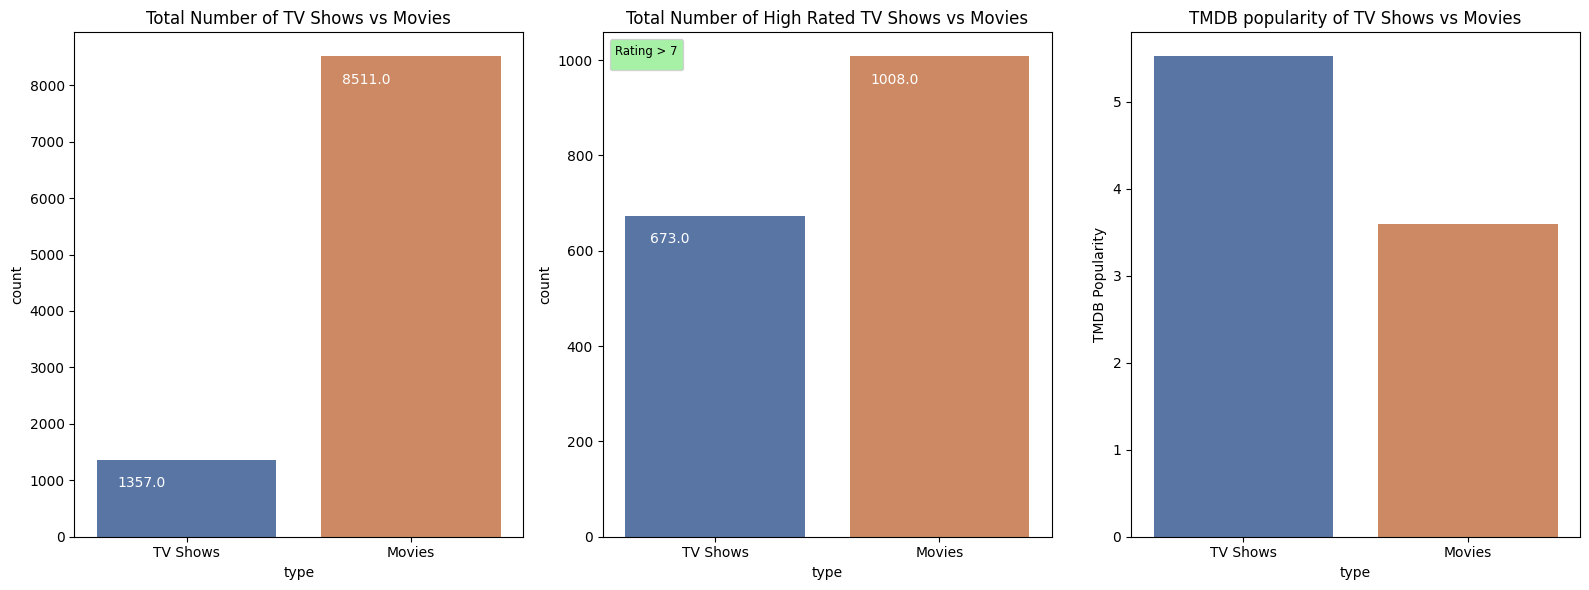

In [ ]:
fig, axes = plt.subplots(1,3,figsize=(16, 6))
# Total number of Movies vs Tv Shows
sns.countplot(x=cleaned_titles_df['type'], data=cleaned_titles_df,palette='deep',ax = axes[0])
axes[0].set_title('Total Number of TV Shows vs Movies')
axes[0].set_xticklabels(['TV Shows','Movies'])
for p in axes[0].patches:
    axes[0].annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', color='white')
# Total number of High Rated Movies vs Tv Shows
# The weighted_average_score above 7 is considered high rated ,filtering tv shows and movies above 7 score
above_7_weighted_average_score = cleaned_titles_df[cleaned_titles_df['weighted_average_score'] > 7]
sns.countplot(x=above_7_weighted_average_score['type'], data=above_7_weighted_average_score,palette='deep',ax = axes[1])
axes[1].set_title('Total Number of High Rated TV Shows vs Movies')
axes[1].set_xticklabels(['TV Shows','Movies'])
axes[1].legend(title="Rating > 7",facecolor='lightgreen', frameon=True,title_fontsize='small')
for p in axes[1].patches:
    axes[1].annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', color='white')
# TMDB popularity of TV Shows vs Movies
sns.barplot(x=cleaned_titles_df['type'],y= cleaned_titles_df['tmdb_popularity'], data=cleaned_titles_df,palette='deep',ax = axes[2], errorbar=None)
axes[2].set_title('TMDB popularity of TV Shows vs Movies')
axes[2].set_ylabel('TMDB Popularity')
axes[2].set_xticklabels(['TV Shows','Movies'])
plt.tight_layout()
plt.show()


##### **Analysis Report**

*   **Total number of Movies are 6.2X Higher than TV Shows.**
*   **Total number of Top Rated Movies are Higher than Top Rated TV Shows but in low margin.**
* **TMDB Popularity is higher for TV Shows than Movies,despite the number of TV Shows are less in number.**

**Business Insights**
* **Focus more on Increasing the number of Quality TV Shows Content.**
* **Remove Low TMDB Popularity movies or Low IMDB Rated movies for Cost Saving.**






#### **Chart - 2 - Heatmap finding correlation for runtime,imdb_score,tmdb_score,tmdb_popularity**

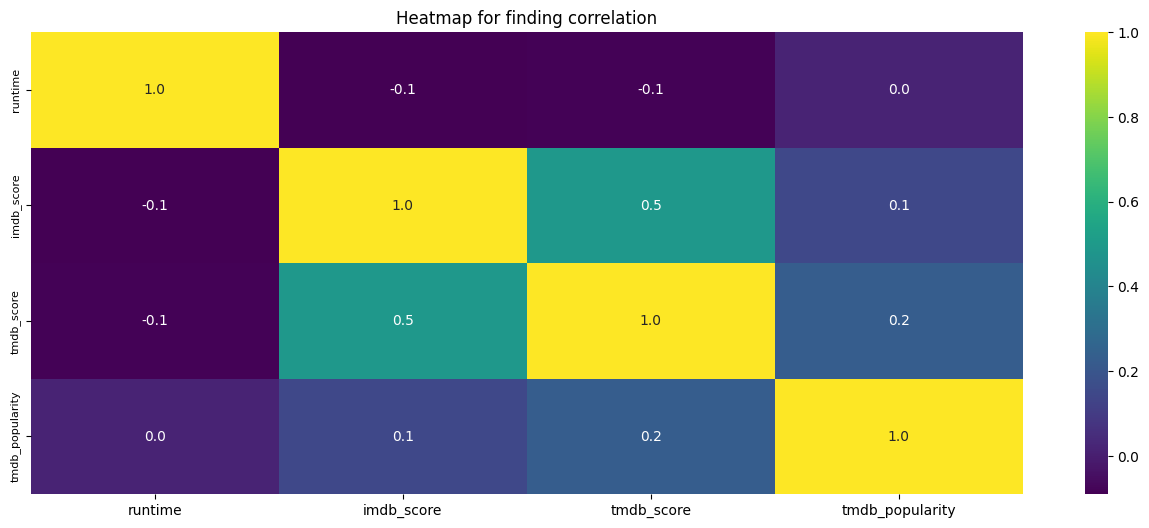

In [ ]:
# Heatmap finding correlation for runtime ,imdb_score,tmdb_score,tmdb_popularity
selected_columns_for_correlation = ['runtime', 'imdb_score','tmdb_score','tmdb_popularity']
selected_columns_for_correlation_df = cleaned_titles_df[selected_columns_for_correlation].corr()
plt.figure(figsize=(16, 6)) # Optional: Adjust figure size
ax = sns.heatmap(selected_columns_for_correlation_df, annot=True, cmap='viridis', fmt=".1f")
plt.title('Heatmap for finding correlation')
ax.set_yticklabels(selected_columns_for_correlation,fontsize=8)
plt.show()

##### **Analysis Report**

* **TMDb popularity correlates weakly with IMDb score.**
* **TMDb popularity correlates weakly with Runtime.**
* **TMDb score and IMDb score are moderatly positive correlated**

**Business Insights**
* **Focus on quality.Longer/Shorter runtime is not equal to better IMDb score/TMDb score.**
* **Scores from different sources IMDb and TMDb are positively correlated.**






#### **Chart - 3 - line plot for finding Average Rating Score by Release Decade**

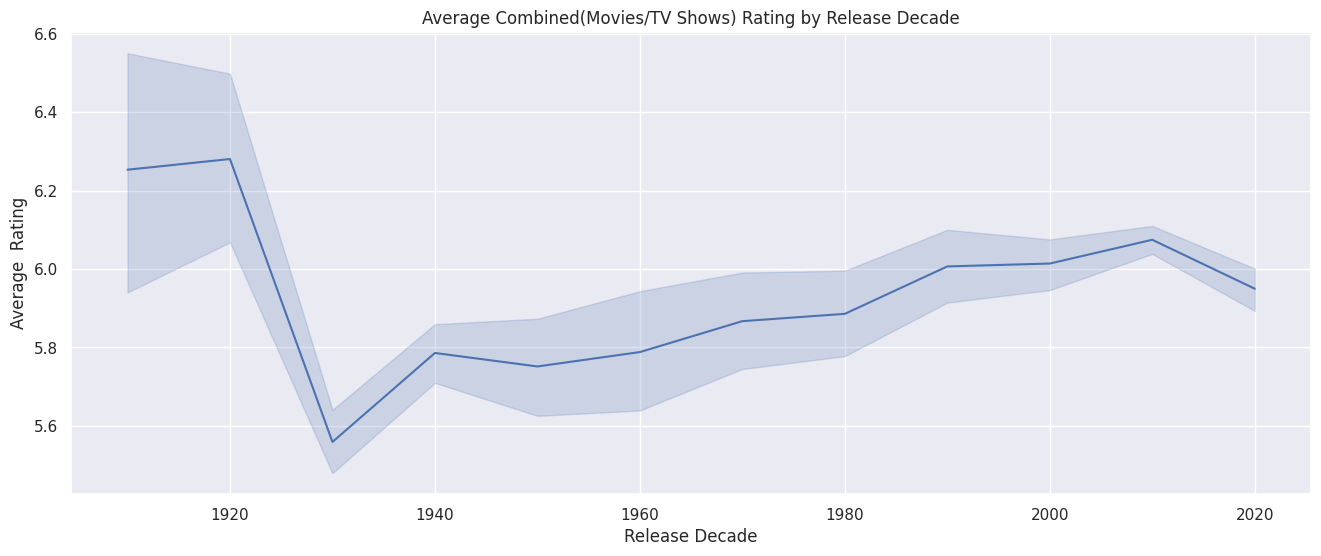

In [ ]:
# line plot for finding Average Score by Release Decade
sns.lineplot(x=cleaned_titles_df['decade'], y=cleaned_titles_df['weighted_average_score'], data=cleaned_titles_df,palette='deep')
sns.set(rc={'figure.figsize':(16, 6)})
plt.title('Average Combined(Movies/TV Shows) Rating by Release Decade')
plt.ylabel('Average  Rating')
plt.xlabel('Release Decade')
plt.show()

##### **Analysis Report**

* **Ratings Increased sightly decade by decade.**
* **Largest Rating Drop observed between 1920-1930.**
* **Second Largest Rating Drop observed between 2010-2020.**

****Business Insights**
* **Consistent quality since the 1940s.**
* **Second Largest Rating Drop in recent decade Indicating potential fatigue or shifts in rating behaviors.**


#### **Chart - 4 - Genre Analysis**

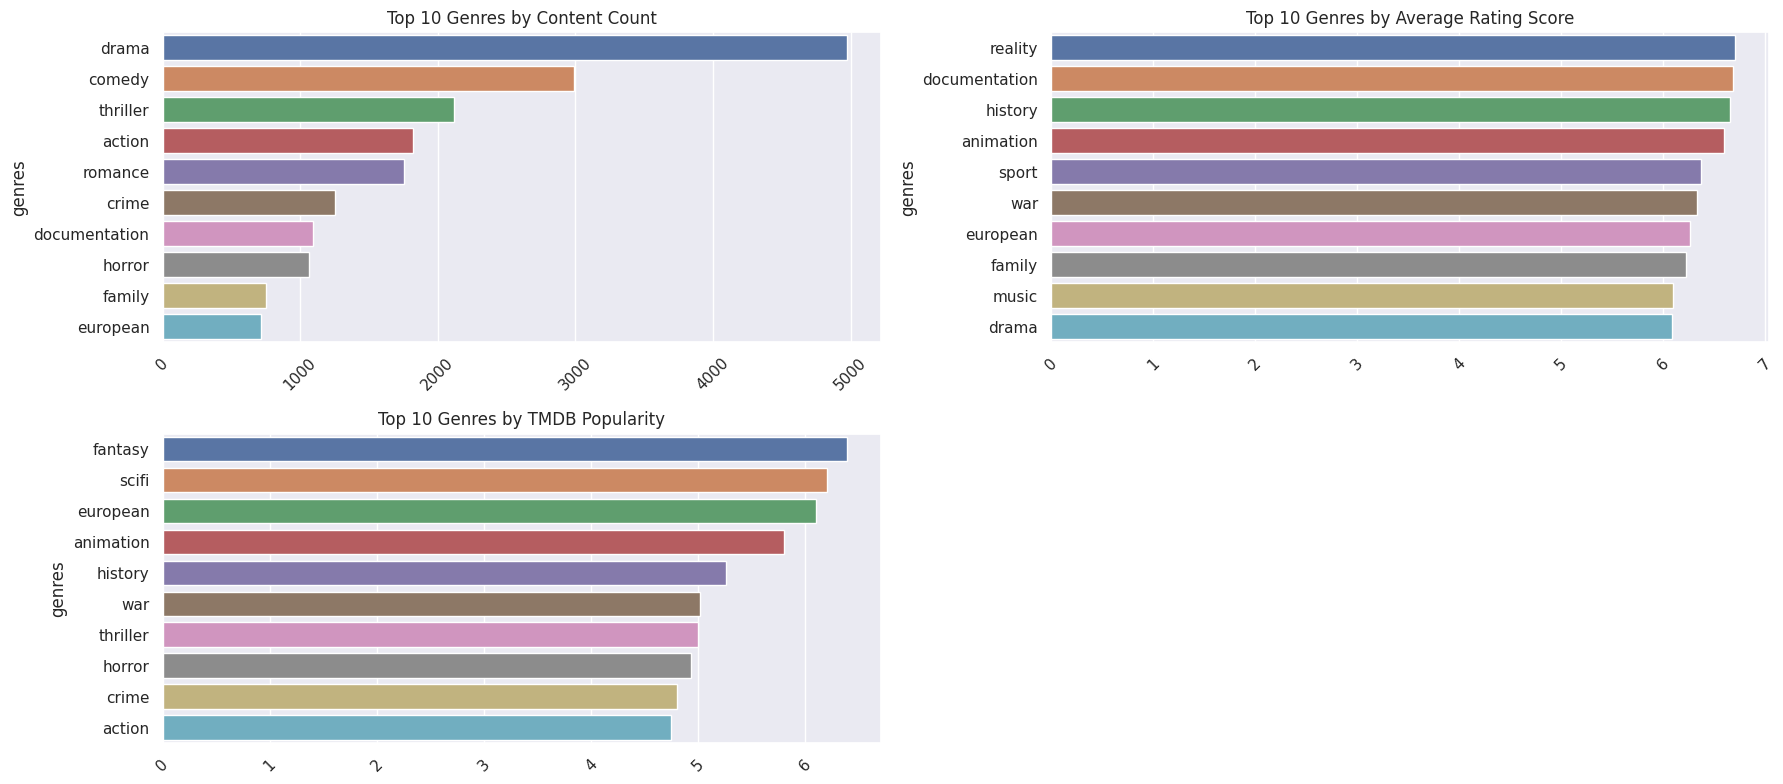

In [ ]:
# explode() is used to convert lists in a column into multiple rows.
df_exploded = cleaned_titles_df.explode('genres')
# top 10 genre by content count
temp_df = df_exploded['genres'].value_counts().nlargest(10)
fig, axes = plt.subplots(2,2,figsize=(18, 8))
sns.barplot(y=temp_df.index,x=temp_df.values, palette="deep",ax = axes[0,0])
axes[0,0].set_title('Top 10 Genres by Content Count')
axes[0,0].tick_params(axis='x', labelrotation=45)
# top 10 genre by weighted_average_score
temp_df = df_exploded.groupby('genres')['weighted_average_score'].mean().nlargest(10)
sns.barplot(y=temp_df.index,x=temp_df.values, palette="deep",ax = axes[0,1])
axes[0,1].set_title('Top 10 Genres by Average Rating Score')
axes[0,1].tick_params(axis='x', labelrotation=45)
# top 10 genre by TMDB_popularity
temp_df = df_exploded.groupby('genres')['tmdb_popularity'].mean().nlargest(10)
sns.barplot(y=temp_df.index,x=temp_df.values, palette="deep",ax = axes[1,0])
axes[1,0].set_title('Top 10 Genres by TMDB Popularity')
axes[1,0].tick_params(axis='x', labelrotation=45)
axes[1, 1].axis('off') # Hides the axes, ticks, and labels
# top 10 genre by release decade
plt.tight_layout()
plt.show()


##### **Analysis Report**

* **Drama,comedy,thriller are Top 3 genres by content Count.**
* **Reality,documentation,history are Top 3 genres by Ratings.**
* **Fantasy,scifi,european are Top 3 genres by Ratings**

**Business Insights**
* **Add more Fantasy,scifi Genre Movies/TV Shows. Because Fantasy and scifi are most popular and their respective content counts are low.**
* **Reduce the Drama genre Movies/TV Shows with low ratings for cost saving,since Drame genre is not popular.**


#### **Chart - 5 - Production Countries Analysis**

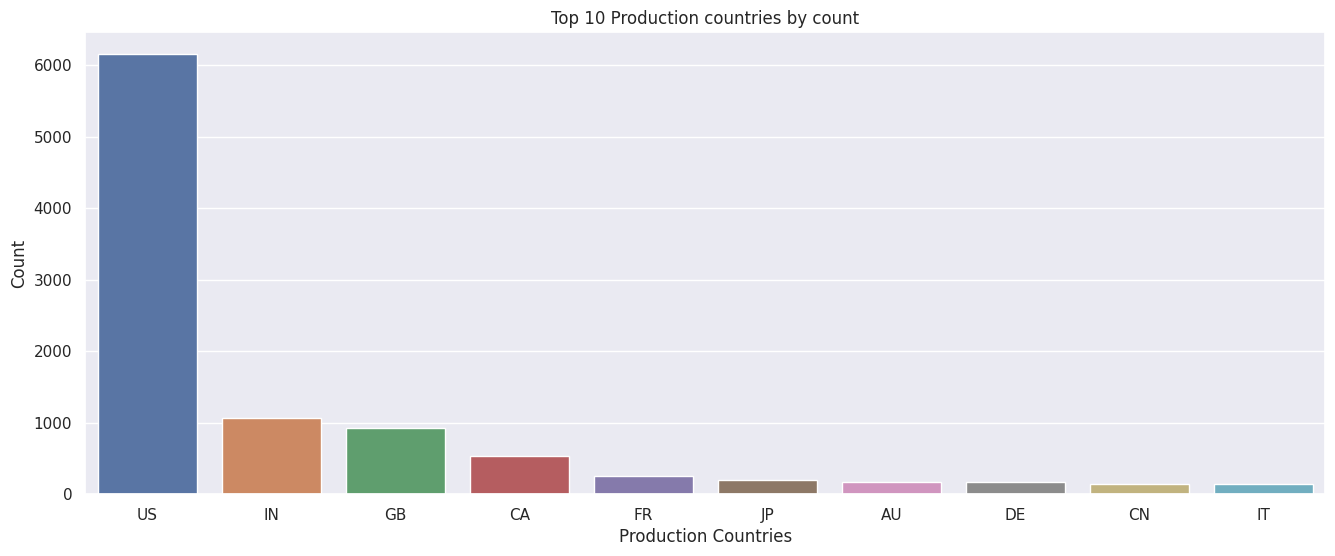

In [ ]:
#Top 10 Production countries by count
df_exploded = cleaned_titles_df.explode('production_countries')
temp_df = df_exploded['production_countries'].value_counts().nlargest(10)
ax =sns.barplot(x=temp_df.index,y=temp_df.values, palette="deep")
plt.title('Top 10 Production countries by count')
plt.ylabel('Count')
plt.xlabel('Production Countries')
sns.set(rc={'figure.figsize':(16, 6)})
plt.show()


##### **Analysis Report**

* **Dominated by the US, followed by India, UK, Canada..**

**Business Insights**
* **Consider global content strategies and regional marketing for top countries.**



#### **Chart - 6 - Credits Analysis**

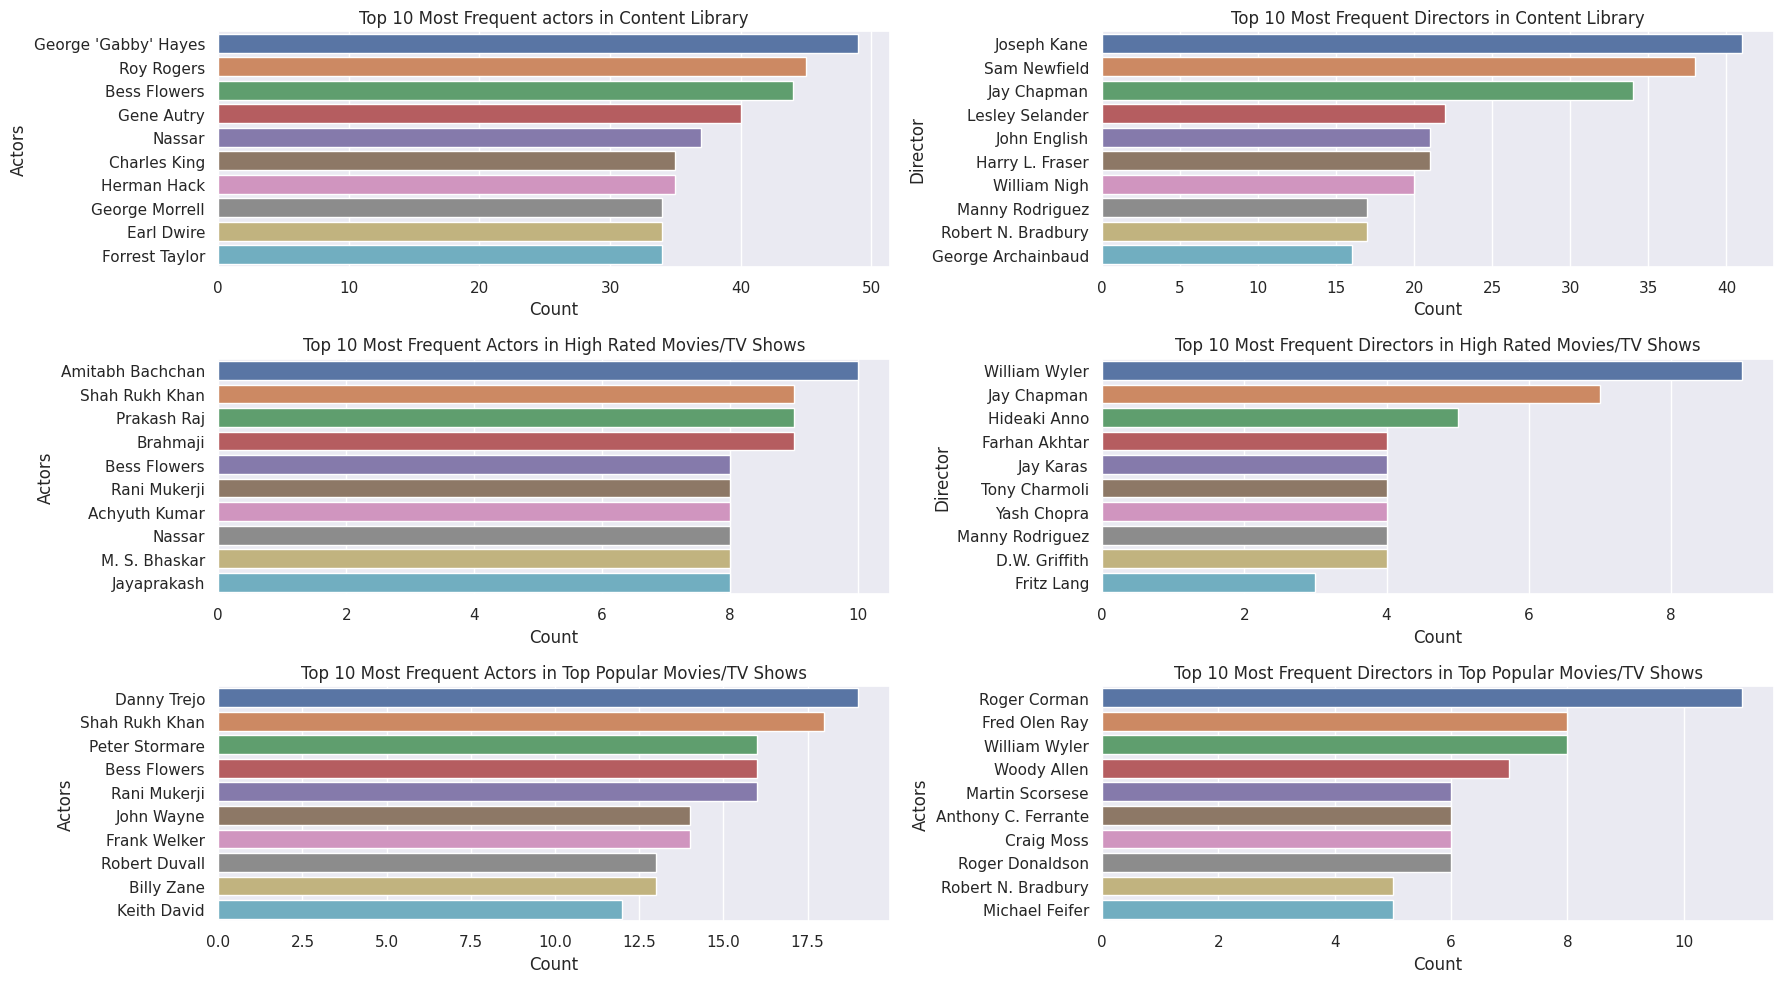

In [ ]:
# Top 10 Most Frequent actors
temp_df = cleaned_credits_df[cleaned_credits_df['role'] == 'actor']['name'].value_counts().nlargest(10).reset_index()
fig, axes = plt.subplots(3,2,figsize=(18, 10))
sns.barplot(y=temp_df['name'],x = temp_df['count'],palette='deep',ax = axes[0,0])
axes[0,0].set_title('Top 10 Most Frequent actors in Content Library')
axes[0,0].set_ylabel('Actors')
axes[0,0].set_xlabel('Count')
# Top 10 Most Frequent directors
temp_df = cleaned_credits_df[cleaned_credits_df['role'] == 'director']['name'].value_counts().nlargest(10).reset_index()
sns.barplot(y=temp_df['name'],x = temp_df['count'],palette='deep',ax = axes[0,1])
axes[0,1].set_title('Top 10 Most Frequent Directors in Content Library')
axes[0,1].set_ylabel('Director')
axes[0,1].set_xlabel('Count')
# combine titles dataframe and credits dataframe and find Top 10 actors in high rated movies
top_rated_movies = cleaned_titles_df[cleaned_titles_df['weighted_average_score'] > 7]
top_rated_movies_credits = top_rated_movies.merge(cleaned_credits_df, left_on='id', right_on='id', how='inner')
# Top 10 Most Frequent actors in top_rated_movies_credits dataframe
temp_df = top_rated_movies_credits[top_rated_movies_credits['role'] == 'actor']['name'].value_counts().nlargest(10).reset_index()
sns.barplot(y=temp_df['name'],x = temp_df['count'],palette='deep',ax = axes[1,0])
axes[1,0].set_title('Top 10 Most Frequent Actors in High Rated Movies/TV Shows')
axes[1,0].set_ylabel('Actors')
axes[1,0].set_xlabel('Count')
# Top 10 Most Frequent director in top_rated_movies_credits dataframe
temp_df = top_rated_movies_credits[top_rated_movies_credits['role'] == 'director']['name'].value_counts().nlargest(10).reset_index()
temp_df.head()
sns.barplot(y=temp_df['name'],x = temp_df['count'],palette='deep',ax = axes[1,1])
axes[1,1].set_title('Top 10 Most Frequent Directors in High Rated Movies/TV Shows')
axes[1,1].set_ylabel('Director')
axes[1,1].set_xlabel('Count')
top_popularity_movies = cleaned_titles_df[cleaned_titles_df['tmdb_popularity'] > cleaned_titles_df['tmdb_popularity'].mean()]
top_popularity_movies_credits = top_popularity_movies.merge(cleaned_credits_df, left_on='id', right_on='id', how='inner')
# Top 10 Most Frequent actors in top_popularity_movies_credits dataframe
temp_df = top_popularity_movies_credits[top_popularity_movies_credits['role'] == 'actor']['name'].value_counts().nlargest(10).reset_index()
sns.barplot(y=temp_df['name'],x = temp_df['count'],palette='deep',ax = axes[2,0])
axes[2,0].set_title('Top 10 Most Frequent Actors in Top Popular Movies/TV Shows')
axes[2,0].set_ylabel('Actors')
axes[2,0].set_xlabel('Count')
# Top 10 Most Frequent directors in top_popularity_movies_credits dataframe
temp_df = top_popularity_movies_credits[top_popularity_movies_credits['role'] == 'director']['name'].value_counts().nlargest(10).reset_index()
sns.barplot(y=temp_df['name'],x = temp_df['count'],palette='deep',ax = axes[2,1])
axes[2,1].set_title('Top 10 Most Frequent Directors in Top Popular Movies/TV Shows')
axes[2,1].set_ylabel('Actors')
axes[2,1].set_xlabel('Count')
plt.tight_layout()
plt.show()

##### **Analysis Report**

* **Top 10 Frequent Actors by Content Count,High Rated Movies/Shows,High Popularity Movies/Shows are radically different.**
* **Top 10 Frequent Directors by Content Count,High Rated Movies/Shows,High Popularity Movies/Shows are radically different.**


**Business Insights**
* **Cast Actors from Top Rated/Popularity chart data, Very few Top Rated/Popularity Actors are available in content libary.**
* **Cast Directors from Top Rated/Popularity chart data, Very few Top Rated/Popularity Dircetors are available in content libary.**

# **Conclusion/Business Insights**

* **Focus more on Increasing the number of Quality TV Shows Content.**
* **Remove Low TMDB Popularity movies or Low IMDB Rated movies for Cost Saving.**
* **Focus on quality.Longer/Shorter runtime is not equal to better IMDb score/TMDb score.**
* **Scores from different sources IMDb and TMDb are positively correlated.**
* **Consistent quality since the 1940s.**
* **Second Largest Rating Drop in recent decade Indicating potential fatigue or shifts in rating behaviors.**
* **Add more Fantasy,scifi Genre Movies/TV Shows. Because Fantasy and scifi are most popular and their respective content counts are low.**
* **Reduce the Drama genre Movies/TV Shows with low ratings for cost saving,since Drame genre is not popular.**
* **Cast Actors from Top Rated/Popularity chart data, Very few Top Rated/Popularity Actors are available in content libary.**
* **Cast Directors from Top Rated/Popularity chart data, Very few Top Rated/Popularity Dircetors are available in content libary.**


PDF copy (colab) : https://drive.google.com/file/d/1yPoYbOi0DnzBjZ4iuZjtvQSxy7FtUlc2/view?usp=sharing

PDF copy(non-colab) : https://drive.google.com/file/d/1FggL8DQZDMukkLmpMcoCP_zgbmgvHHbu/view?usp=sharing

Video Explanation: https://drive.google.com/file/d/1WOMUUgoH77pNdrSOtggSTTY-W_i6iFn1/view?usp=sharing